<a href="https://colab.research.google.com/github/itsdivya1309/Machine-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Possum Regression**

1. Can we use total length to predict a possum's head length?
2. Which possum body dimensions are most correlated with age and sex?
3. Can we classify a possum's sex by its body dimensions and location?
4. Can we predict a possum's trapping location from its body dimensions?

Clearly, part 1 can be solved by linear regression with single variable.

**1. Importing the required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import sklearn

**2. Importing dataset**

Will be using possum dataset, available on kaggle.

In [2]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! kaggle datasets download -d abrambeyer/openintro-possum

  0% 0.00/2.15k [00:00<?, ?B/s]
100% 2.15k/2.15k [00:00<00:00, 1.73MB/s]


In [4]:
! unzip openintro-possum.zip

Archive:  openintro-possum.zip
  inflating: possum.csv              


In [5]:
dataset = pd.read_csv('possum.csv')

In [6]:
dataset.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


**3. Data Analysis**

Since I only need total length and head length of the possum; I'll be doing the following things in this step:
1. Make a matrix of head length. (dependent variable)
2. Make a matrix of total length. (predictor variable)
3. Draw a scatterplot between the two.

In [7]:
X = np.array(dataset['totlngth']).reshape(104,1)
y = np.array(dataset['hdlngth']).reshape(104,1)

In [8]:
#Checking the shape
X.shape

(104, 1)

In [9]:
y.shape

(104, 1)

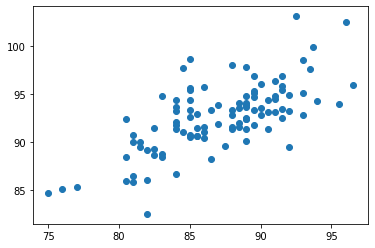

In [10]:
plt.scatter(X,y)

**4. Splitting into training and testing dataset**

Before splitting the dataset, we create our hypothesis:

```
   h(x) = theta0 + theta*x = prediction
=> theta0*1 + thata*x = prediction
=> [1 x][theta0 theta1]' = prediction
```
Here dimensions of [1  x] = (m,2)
[theta0 theta1]' = (2,1)
prediction = (m,1)

So, before splitting into training and testing datasets, I have to add modify X and create a theta array.



In [11]:
one = np.ones(y.shape)

In [12]:
one.shape

(104, 1)

In [13]:
X = np.append(one,X, axis = 1)

In [14]:
X.shape

(104, 2)

In [42]:
#Creating theta array
theta0,theta1 = 1,1
theta = np.array([theta0,theta1]).reshape(2,1)
theta.shape

(2, 1)

In [43]:
#Now, splitting into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [44]:
X_train.shape

(78, 2)

In [45]:
y_test.shape[0]

26

**5. Creating the model**

In [46]:
#Prediction: y_pred = X.theta
y_pred = np.dot(X_train,theta)

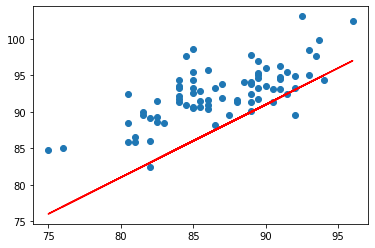

In [70]:
x = X_train[:,1]
plt.scatter(x,y_train)
plt.plot(x,y_pred,color='red')

In [47]:
def costFunction(y_pred,y_train):
  MSE = np.square(np.subtract(y_pred,y_train))
  sqsum=0
  for i in range(MSE.shape[0]):
    sqsum+=MSE[i]
  J = sqsum/(2*y_train.shape[0])
  return J
costFunction(y_pred,y_train)
#print(MSE)

array([15.83679487])

In [48]:
def elementwiseDifference(y_train,X_train,theta):
  y_pred = np.dot(X_train,theta)
  Sum =np.zeros_like(theta)
  for j in range(theta.shape[0]):
    sum = 0
    for i in range(X_train.shape[0]):
      sum += (y_pred[i] - y_train[i])*X[i][j]
    Sum[j] = sum
  return Sum
elementwiseDifference(y_train,X_train,theta)


array([[  -367],
       [-32332]])

In [49]:
#Setting arbitrary alpha
alpha = 0.01

In [76]:
#Updating theta:
#Gradient Descent
def gradientDescent(alpha,X_train,y_train,theta):
  sum = 0
  y_pred = np.dot(X_train,theta)
  J = costFunction(y_pred,y_train)
  
  theta = np.subtract(theta,(alpha/y_train.shape[0])*elementwiseDifference(y_train,X_train,theta))
  print(theta)
  y_pred = np.dot(X_train,theta)
  J_temp = costFunction(y_pred,y_train)
    
  return J_temp
gradientDescent(alpha,X_train,y_train,theta)
  
    


[[1.04705128]
 [5.14512821]]


array([63277.80987052])

In [77]:
#I need to apply gradient Descent till my cost function becomes minimum
J = costFunction(y_pred,y_train)
J_temp = gradientDescent(alpha,X_train,y_train,theta)
while(J>J_temp):
  J = J_temp
  J_temp = gradientDescent(alpha,X_train,y_train,theta)
print(J)
y_pred = np.dot(X_train,theta)

[[1.04705128]
 [5.14512821]]
[15.83679487]


In [55]:
#Checking model accuracy
from sklearn.metrics import accuracy_score
print('Model accuracy: {0:0f}'.format(accuracy_score(y_train,y_pred)))

ValueError: ignored

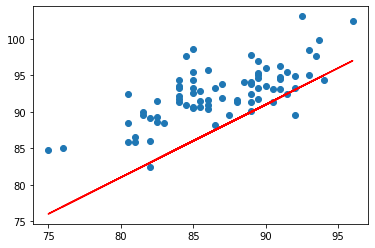

In [78]:
x = X_train[:,1]
plt.scatter(x,y_train)
plt.plot(x,y_pred,color='red')
#plt.scatter(x,y_pred,'green')

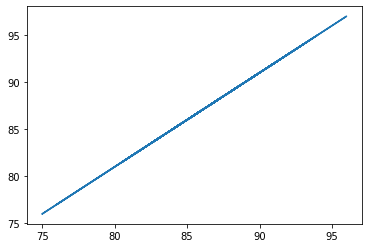

In [66]:
plt.plot(x,y_pred)